In [1]:
import pandas as pd
import os

def load_and_label_data(folder_path, filenames):
    data_frames = []
    for filename in filenames:
        file_path = os.path.join(folder_path, filename)
        if not os.path.exists(file_path):
            print(f"Warning: File not found at {file_path}. Skipping.")
            continue
        
        df = pd.read_csv(file_path)
        activity_name = os.path.splitext(os.path.basename(file_path))[0]
        df['activity'] = activity_name
        data_frames.append(df)
        
    return data_frames

def combine_and_clean_data(data_frames):
    combined_df = pd.concat(data_frames, ignore_index=True)
    combined_df.interpolate(method='linear', inplace=True, limit_direction='both')
    return combined_df

def segment_data_by_activity(df):
    return {activity: group for activity, group in df.groupby('activity')}

def main():
    folder_path = r"C:\Users\lahit\Downloads\wetransfer_implementation_2024-02-07_1029 (1)\dataset\dataset"
    
    filenames = [
        'walking.csv', 'sitting.csv', 'running.csv', 'lying.csv', 
        'jumping.csv', 'climbing_up.csv', 'climbing_down.csv'
    ]
    
    all_data_frames = load_and_label_data(folder_path, filenames)
    
    if not all_data_frames:
        print("No data was loaded. Exiting.")
        return

    combined_data = combine_and_clean_data(all_data_frames)
    
    activity_segments = segment_data_by_activity(combined_data)
    
    print("--- Sampled Segment: walking ---")
    if 'walking' in activity_segments:
        print(activity_segments['walking'].head())

    output_filename = 'combined_cleaned_data_modular.csv'
    combined_data.to_csv(output_filename, index=False)
    
    print(f"\n✅ Modular script execution complete.")
    print(f"Combined and cleaned data saved to '{output_filename}'")

if __name__ == "__main__":
    main()

C:\Users\lahit\AppData\Local\Temp\ipykernel_8068\3076723309.py:21: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  combined_df.interpolate(method='linear', inplace=True, limit_direction='both')


--- Sampled Segment: walking ---
   id     attr_time    attr_x    attr_y    attr_z activity  Unnamed: 4
0   1  1.435993e+12 -2.160767  9.400234  0.565032  walking    0.754174
1   2  1.435993e+12 -2.176928  9.395446  0.621295  walking    0.754174
2   3  1.435993e+12 -2.151190  9.382876  0.588974  walking    0.754174
3   4  1.435993e+12 -2.135029  9.319430  0.545878  walking    0.754174
4   5  1.435993e+12 -2.168548  9.306262  0.586579  walking    0.754174

✅ Modular script execution complete.
Combined and cleaned data saved to 'combined_cleaned_data_modular.csv'


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Ensure the combined CSV file from your first script exists and is loaded
try:
    df = pd.read_csv('combined_cleaned_data_modular.csv')
except FileNotFoundError:
    print("Error: 'combined_cleaned_data_modular.csv' not found.")
    print("Please run the first data processing script to generate it.")
    # In a real script, you might exit here. In a notebook, just ensure the file exists.

# Define features and target
features = ['attr_x', 'attr_y', 'attr_z']
target = 'activity'

X = df[features].values
y = df[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"✅ Data prepared successfully. Shape of feature matrix: {X_scaled.shape}")

✅ Data prepared successfully. Shape of feature matrix: (389129, 3)


In [2]:
import pandas as pd
import numpy as np
import os
import kmapper as km
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split

# --- 1. Data Loading and Cleaning ---

def load_and_label_data(folder_path, filenames):
    """
    Loads multiple CSV files from a folder, adds an 'activity' column based 
    on the filename, and returns a list of pandas DataFrames.
    """
    data_frames = []
    for filename in filenames:
        file_path = os.path.join(folder_path, filename)
        if not os.path.exists(file_path):
            print(f"Warning: File not found at {file_path}. Skipping.")
            continue
        
        df = pd.read_csv(file_path)
        activity_name = os.path.splitext(os.path.basename(file_path))[0]
        df['activity'] = activity_name
        data_frames.append(df)
    return data_frames

def combine_and_clean_data(data_frames):
    """
    Combines a list of DataFrames into one, handles non-numeric data in feature
    columns, and interpolates missing values.
    """
    if not data_frames:
        return pd.DataFrame()
    
    combined_df = pd.concat(data_frames, ignore_index=True)
    
    # Ensure feature columns are numeric, coercing errors to NaN
    for col in ['attr_x', 'attr_y', 'attr_z']:
        if combined_df[col].dtype == 'object':
            combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')
            
    # Interpolate missing values (now NaNs)
    combined_df.interpolate(method='linear', inplace=True, limit_direction='both')
    return combined_df

# --- Main Script Execution ---

# IMPORTANT: Replace this with the correct path to your dataset folder
folder_path = r"C:\Users\lahit\Downloads\wetransfer_implementation_2024-02-07_1029 (1)\dataset\dataset"
filenames = [
    'walking.csv', 'sitting.csv', 'running.csv', 'lying.csv', 
    'jumping.csv', 'climbing_up.csv', 'climbing_down.csv'
]

all_data_frames = load_and_label_data(folder_path, filenames)
combined_data = combine_and_clean_data(all_data_frames)

if combined_data.empty:
    print("No data was loaded. Please check your folder_path. Exiting.")
else:
    print("✅ Data loaded and cleaned successfully.")
    
    # --- 2. Feature Preparation ---
    
    features = ['attr_x', 'attr_y', 'attr_z']
    target = 'activity'

    X = combined_data[features].values
    y = combined_data[target]

    # Scale the features for distance-based algorithms
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    print(f"✅ Data prepared for ML. Shape of feature matrix: {X_scaled.shape}")

    # --- 3. KeplerMapper Visualization ---

    # Subsample the data to make visualization faster and clearer
    # Using a smaller sample is often better for interpreting the topological structure.
    sample_size = 30000
    X_sample, _, y_sample, _ = train_test_split(
        X_scaled, y,
        train_size=sample_size,
        random_state=42,
        stratify=y  # Ensures the sample has a similar activity distribution to the original
    )
    
    print(f"Original data shape: {X_scaled.shape}")
    print(f"Using a subsample of shape: {X_sample.shape} for KeplerMapper")

    # Initialize KeplerMapper
    mapper = km.KeplerMapper(verbose=1)

    # Define the lens (projection). We use PCA to project data into 2D.
    lens = mapper.project(
        X_sample,
        projection=PCA(n_components=2),
        scaler=None # Data is already scaled
    )

    # Define the clustering algorithm and create the topological graph
    mapper_graph = mapper.map(
        lens=lens,
        X=X_sample,
        cover=km.Cover(n_cubes=15, perc_overlap=0.4),
        clusterer=DBSCAN(eps=0.5, min_samples=5)
    )

    print("\n✅ Mapper graph constructed successfully.")

    # Create color values for visualization based on the activity label
    activity_names = y_sample.unique()
    activity_to_int = {name: i for i, name in enumerate(activity_names)}
    color_values = y_sample.map(activity_to_int).values

    # Generate the interactive HTML visualization
    output_filename = "human_activity_mapper_visualization.html"
    mapper.visualize(
        mapper_graph,
        title="Topological Analysis of Human Activities",
        path_html=output_filename,
        custom_tooltips=y_sample.values,
        color_values=color_values,
        color_function_name="Activity"
    )
    
    print(f"\n✅ Visualization complete! Please open '{output_filename}' to explore the graph.")


C:\Users\lahit\AppData\Local\Temp\ipykernel_33564\3424344727.py:46: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  combined_df.interpolate(method='linear', inplace=True, limit_direction='both')


✅ Data loaded and cleaned successfully.
✅ Data prepared for ML. Shape of feature matrix: (389129, 3)
Original data shape: (389129, 3)
Using a subsample of shape: (30000, 3) for KeplerMapper
KeplerMapper(verbose=1)
..Projecting on data shaped (30000, 3)

..Projecting data using: 
	PCA(n_components=2)

Mapping on data shaped (30000, 3) using lens shaped (30000, 2)

Creating 225 hypercubes.

Created 461 edges and 148 nodes in 0:00:08.171063.

✅ Mapper graph constructed successfully.
Wrote visualization to: human_activity_mapper_visualization.html

✅ Visualization complete! Please open 'human_activity_mapper_visualization.html' to explore the graph.


C:\Users\lahit\AppData\Local\Temp\ipykernel_33564\3453478188.py:33: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  combined_df.interpolate(method='linear', inplace=True, limit_direction='both')


✅ Data prepared. Training on 4863 sequences, validating on 1216.
Epoch [1/5], Loss: 0.5395
Validation Accuracy: 78.29%
Epoch [2/5], Loss: 0.3475
Validation Accuracy: 87.83%
Epoch [3/5], Loss: 0.2215
Validation Accuracy: 90.46%
Epoch [4/5], Loss: 0.2177
Validation Accuracy: 93.75%
Epoch [5/5], Loss: 0.0968
Validation Accuracy: 95.56%

✅ Training complete.

--- Classification Report ---
               precision    recall  f1-score   support

climbing_down       0.97      0.95      0.96       563
  climbing_up       0.94      0.93      0.94        91
      jumping       0.99      0.99      0.99       145
        lying       0.95      0.98      0.96       108
      running       0.91      0.91      0.91       113
      sitting       0.93      0.95      0.94       107
      walking       0.92      0.99      0.95        89

     accuracy                           0.96      1216
    macro avg       0.94      0.96      0.95      1216
 weighted avg       0.96      0.96      0.96      1216


---

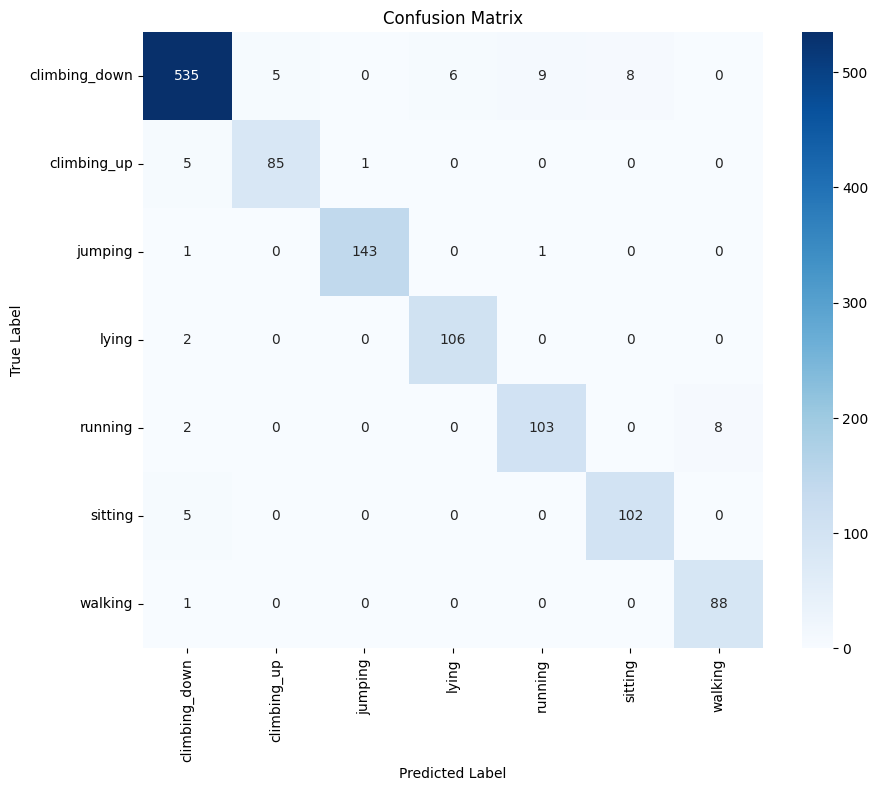

In [3]:
import pandas as pd
import numpy as np
import os
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def load_and_label_data(folder_path, filenames):
    data_frames = []
    for filename in filenames:
        file_path = os.path.join(folder_path, filename)
        if not os.path.exists(file_path):
            print(f"Warning: File not found at {file_path}. Skipping.")
            continue
        df = pd.read_csv(file_path)
        activity_name = os.path.splitext(os.path.basename(file_path))[0]
        df['activity'] = activity_name
        data_frames.append(df)
    return data_frames

def combine_and_clean_data(data_frames):
    if not data_frames:
        return pd.DataFrame()
    combined_df = pd.concat(data_frames, ignore_index=True)
    for col in ['attr_x', 'attr_y', 'attr_z']:
        if combined_df[col].dtype == 'object':
            combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')
    combined_df.interpolate(method='linear', inplace=True, limit_direction='both')
    return combined_df

def create_sequences(X, y, time_steps=100, step=50):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        sequence_data = X[i:(i + time_steps)]
        labels_in_window = y.iloc[i: i + time_steps]
        most_frequent_label = labels_in_window.mode()[0]
        Xs.append(sequence_data)
        ys.append(most_frequent_label)
    return np.array(Xs), np.array(ys)

class ActivityTransformer(nn.Module):
    def __init__(self, input_dim=3, model_dim=32, n_head=4, n_layers=2, num_classes=7):
        super(ActivityTransformer, self).__init__()
        self.input_projection = nn.Linear(input_dim, model_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=n_head, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)
        self.classifier = nn.Linear(model_dim, num_classes)

    def forward(self, x):
        x = self.input_projection(x)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)
        x = self.classifier(x)
        return x

folder_path = r"C:\Users\lahit\Downloads\wetransfer_implementation_2024-02-07_1029 (1)\dataset\dataset"
filenames = [
    'walking.csv', 'sitting.csv', 'running.csv', 'lying.csv', 
    'jumping.csv', 'climbing_up.csv', 'climbing_down.csv'
]

all_data_frames = load_and_label_data(folder_path, filenames)
combined_data = combine_and_clean_data(all_data_frames)

if combined_data.empty:
    print("No data loaded. Exiting.")
else:
    features = ['attr_x', 'attr_y', 'attr_z']
    target = 'activity'
    X = combined_data[features]
    y = combined_data[target]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    TIME_STEPS = 128
    STEP = 64
    X_sequences, y_sequences = create_sequences(X_scaled, y, TIME_STEPS, STEP)

    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y_sequences)
    
    X_tensor = torch.tensor(X_sequences).float()
    y_tensor = torch.tensor(y_encoded).long()

    dataset = TensorDataset(X_tensor, y_tensor)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    BATCH_SIZE = 64
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
    
    print(f"✅ Data prepared. Training on {train_size} sequences, validating on {val_size}.")

    num_classes = len(label_encoder.classes_)
    model = ActivityTransformer(num_classes=num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    NUM_EPOCHS = 5
    for epoch in range(NUM_EPOCHS):
        model.train()
        for sequences, labels in train_loader:
            outputs = model(sequences)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {loss.item():.4f}')

        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for sequences, labels in val_loader:
                outputs = model(sequences)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            print(f'Validation Accuracy: {(100 * correct / total):.2f}%')

    print("\n✅ Training complete.")

    y_pred_list = []
    y_true_list = []
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            outputs = model(sequences)
            _, predicted = torch.max(outputs.data, 1)
            y_pred_list.extend(predicted.cpu().numpy())
            y_true_list.extend(labels.cpu().numpy())

    print("\n--- Classification Report ---")
    print(classification_report(y_true_list, y_pred_list, target_names=label_encoder.classes_))

    print("\n--- Confusion Matrix ---")
    cm = confusion_matrix(y_true_list, y_pred_list)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


C:\Users\lahit\AppData\Local\Temp\ipykernel_33564\1257648654.py:36: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  combined_df.interpolate(method='linear', inplace=True, limit_direction='both')


✅ Data prepared. Training on 4863 sequences, validating on 1216.
Epoch [1/20], Loss: 1.1398
Validation Accuracy: 48.77%
Epoch [2/20], Loss: 1.0458
Validation Accuracy: 55.18%
Epoch [3/20], Loss: 1.2211
Validation Accuracy: 44.57%
Epoch [4/20], Loss: 1.0233
Validation Accuracy: 51.40%
Epoch [5/20], Loss: 1.1829
Validation Accuracy: 57.15%
Epoch [6/20], Loss: 0.8867
Validation Accuracy: 58.72%
Epoch [7/20], Loss: 0.8868
Validation Accuracy: 60.53%
Epoch [8/20], Loss: 0.7233
Validation Accuracy: 60.44%
Epoch [9/20], Loss: 1.0360
Validation Accuracy: 59.70%
Epoch [10/20], Loss: 0.8058
Validation Accuracy: 58.22%
Epoch [11/20], Loss: 0.9443
Validation Accuracy: 57.07%
Epoch [12/20], Loss: 0.7270
Validation Accuracy: 63.98%
Epoch [13/20], Loss: 0.6997
Validation Accuracy: 67.85%
Epoch [14/20], Loss: 0.8185
Validation Accuracy: 70.07%
Epoch [15/20], Loss: 0.7275
Validation Accuracy: 69.08%
Epoch [16/20], Loss: 0.7507
Validation Accuracy: 66.37%
Epoch [17/20], Loss: 0.6118
Validation Accuracy:

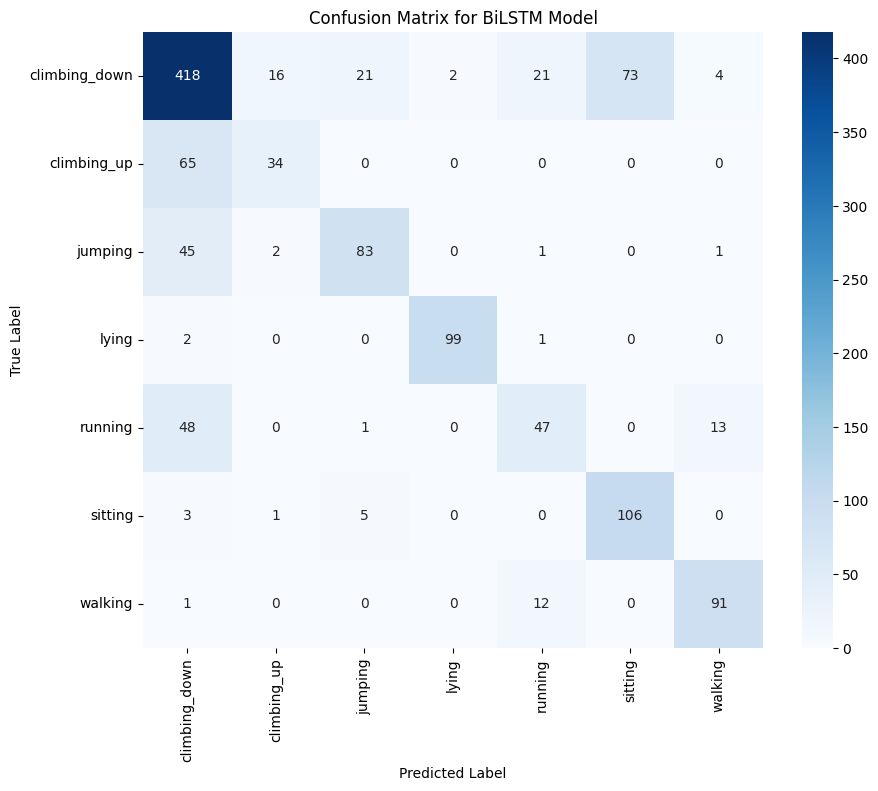

In [5]:
import pandas as pd
import numpy as np
import os
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Data Loading and Cleaning ---

def load_and_label_data(folder_path, filenames):
    """Loads CSV files, adds an 'activity' label, and returns a list of DataFrames."""
    data_frames = []
    for filename in filenames:
        file_path = os.path.join(folder_path, filename)
        if not os.path.exists(file_path):
            print(f"Warning: File not found at {file_path}. Skipping.")
            continue
        df = pd.read_csv(file_path)
        activity_name = os.path.splitext(os.path.basename(file_path))[0]
        df['activity'] = activity_name
        data_frames.append(df)
    return data_frames

def combine_and_clean_data(data_frames):
    """Combines DataFrames and interpolates missing values."""
    if not data_frames:
        return pd.DataFrame()
    combined_df = pd.concat(data_frames, ignore_index=True)
    for col in ['attr_x', 'attr_y', 'attr_z']:
        if combined_df[col].dtype == 'object':
            combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')
    combined_df.interpolate(method='linear', inplace=True, limit_direction='both')
    return combined_df

# --- 2. Sequence Creation ---

def create_sequences(X, y, time_steps=100, step=50):
    """Creates overlapping sequences from time-series data."""
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        sequence_data = X[i:(i + time_steps)]
        labels_in_window = y.iloc[i: i + time_steps]
        most_frequent_label = labels_in_window.mode()[0]
        Xs.append(sequence_data)
        ys.append(most_frequent_label)
    return np.array(Xs), np.array(ys)

# --- 3. BiLSTM Model Definition ---

class BiLSTMClassifier(nn.Module):
    """A Bidirectional LSTM model for activity classification."""
    def __init__(self, input_dim, hidden_dim, n_layers, num_classes):
        super(BiLSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        # Define the LSTM layer
        self.lstm = nn.LSTM(input_dim, hidden_dim, n_layers, 
                            batch_first=True, bidirectional=True)
        
        # Define the output layer
        # The input features to the linear layer will be hidden_dim * 2
        # because it's a bidirectional LSTM.
        self.fc = nn.Linear(hidden_dim * 2, num_classes)

    def forward(self, x):
        # x shape: (batch_size, seq_len, input_dim)
        
        # The LSTM returns output and the final hidden and cell states
        # We only need the output of the last time step
        lstm_out, _ = self.lstm(x)
        
        # lstm_out shape: (batch_size, seq_len, hidden_dim * 2)
        # We take the output of the last time step
        last_time_step_out = lstm_out[:, -1, :]
        
        # last_time_step_out shape: (batch_size, hidden_dim * 2)
        out = self.fc(last_time_step_out)
        
        # out shape: (batch_size, num_classes)
        return out

# --- Main Execution ---

# IMPORTANT: Replace with the actual path to your dataset
folder_path = r"C:\Users\lahit\Downloads\wetransfer_implementation_2024-02-07_1029 (1)\dataset\dataset"
filenames = [
    'walking.csv', 'sitting.csv', 'running.csv', 'lying.csv', 
    'jumping.csv', 'climbing_up.csv', 'climbing_down.csv'
]

# Step 1: Load and prepare data
all_data_frames = load_and_label_data(folder_path, filenames)
combined_data = combine_and_clean_data(all_data_frames)

if combined_data.empty:
    print("No data loaded. Exiting.")
else:
    features = ['attr_x', 'attr_y', 'attr_z']
    target = 'activity'
    X = combined_data[features]
    y = combined_data[target]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Step 2: Create sequences
    TIME_STEPS = 128
    STEP = 64
    X_sequences, y_sequences = create_sequences(X_scaled, y, TIME_STEPS, STEP)

    # Step 3: Encode labels and convert to tensors
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y_sequences)
    
    X_tensor = torch.tensor(X_sequences).float()
    y_tensor = torch.tensor(y_encoded).long()

    # Step 4: Create Datasets and DataLoaders
    dataset = TensorDataset(X_tensor, y_tensor)
    train_size = int(0.8 * len(dataset))
    val_size = len(dataset) - train_size
    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    BATCH_SIZE = 64
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)
    
    print(f"✅ Data prepared. Training on {train_size} sequences, validating on {val_size}.")

    # Step 5: Initialize BiLSTM model, loss, and optimizer
    INPUT_DIM = 3
    HIDDEN_DIM = 64
    N_LAYERS = 2
    NUM_CLASSES = len(label_encoder.classes_)

    model = BiLSTMClassifier(INPUT_DIM, HIDDEN_DIM, N_LAYERS, NUM_CLASSES)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    
    # Step 6: Training and Validation Loop
    NUM_EPOCHS = 20  # Increased to 20 epochs
    for epoch in range(NUM_EPOCHS):
        model.train()
        for sequences, labels in train_loader:
            outputs = model(sequences)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {loss.item():.4f}')

        model.eval()
        with torch.no_grad():
            correct = 0
            total = 0
            for sequences, labels in val_loader:
                outputs = model(sequences)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            print(f'Validation Accuracy: {(100 * correct / total):.2f}%')

    print("\n✅ Training complete.")

    # Step 7: Final Evaluation
    y_pred_list = []
    y_true_list = []
    model.eval()
    with torch.no_grad():
        for sequences, labels in val_loader:
            outputs = model(sequences)
            _, predicted = torch.max(outputs.data, 1)
            y_pred_list.extend(predicted.cpu().numpy())
            y_true_list.extend(labels.cpu().numpy())

    # Classification Report
    print("\n--- Classification Report ---")
    print(classification_report(y_true_list, y_pred_list, target_names=label_encoder.classes_))

    # Confusion Matrix
    print("\n--- Confusion Matrix ---")
    cm = confusion_matrix(y_true_list, y_pred_list)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix for BiLSTM Model')
    plt.show()
